# 두 데이터 사이의 관계를 나타내는 지표

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%precision 3

pd.set_option('display.float_format', '{:,.3f}'.format)

In [66]:
df = pd.read_csv("scores_em.csv", index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [67]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]
scores_df = pd.DataFrame({'english': en_scores, 'mathematics': ma_scores}, index=pd.Index(list('ABCDEFGHIJ'), name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


## 공분산
- 두 변수가 함께 변하는 정도를 나타내는 통계적 수치
- 하나의 변수가 변할 때 다른 변수가 어떤 방향으로, 얼마나 변하는지를 보여줌

In [68]:
summary_df = scores_df.copy()
summary_df['english_deviation'] = summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] = summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.000,-6.400,83.200
B,69,80,14.000,8.600,120.400
C,56,63,1.000,-8.400,-8.400
D,41,63,-14.000,-8.400,117.600
E,57,76,2.000,4.600,9.200
F,48,60,-7.000,-11.400,79.800
G,65,81,10.000,9.600,96.000
H,49,66,-6.000,-5.400,32.400
I,65,78,10.000,6.600,66.000


In [69]:
summary_df['product of deviations'].mean()

62.800

In [70]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [71]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.000, 68.440)

## 상관계수 (Correlation Coefficient)
- 두 변수 사이의 선형적 관계가 얼마나 강한지를 나타내는 수치
- 공분산을 각 변수의 표준편차로 나누어 -1에서 +1 사이의 값으로 표준화한 것

In [72]:
np.cov(en_scores, ma_scores, ddof=0)[0,1] / (np.std(en_scores) * np.std(ma_scores))

0.819

In [73]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [74]:
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


## 2차원 데이터의 시각화

### 산점도

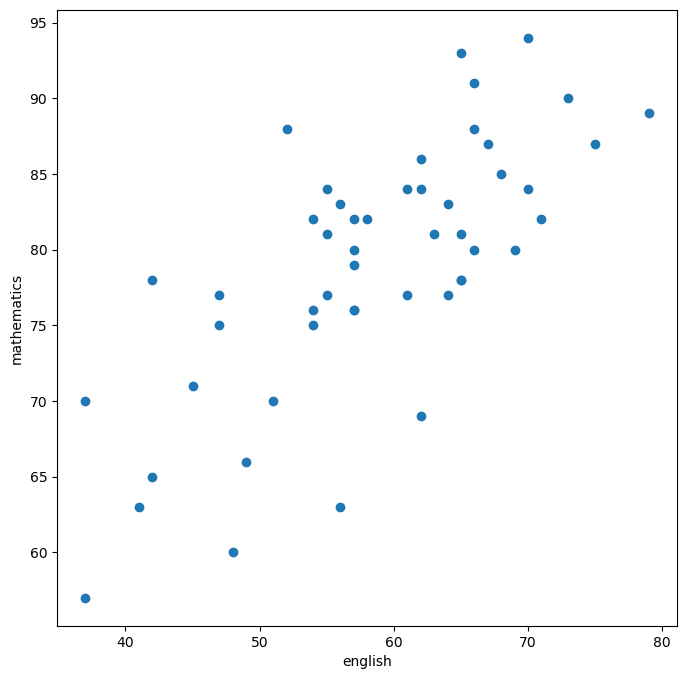

In [75]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
plt.show()

### 회귀직선

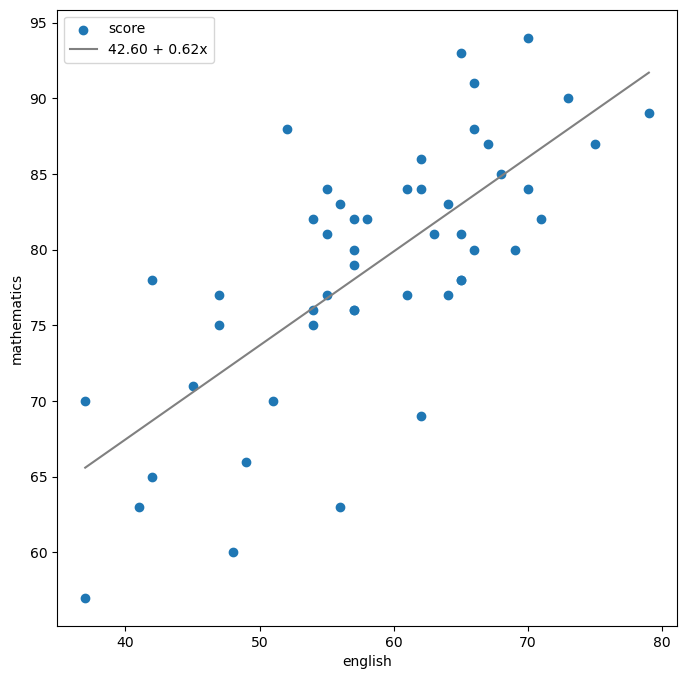

In [76]:
poly_fit = np.polyfit(english_scores, math_scores, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(english_scores.min(), english_scores.max())
ys = poly_1d(xs)

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x')
ax.legend(loc='upper left')
plt.show()

### 히트맵

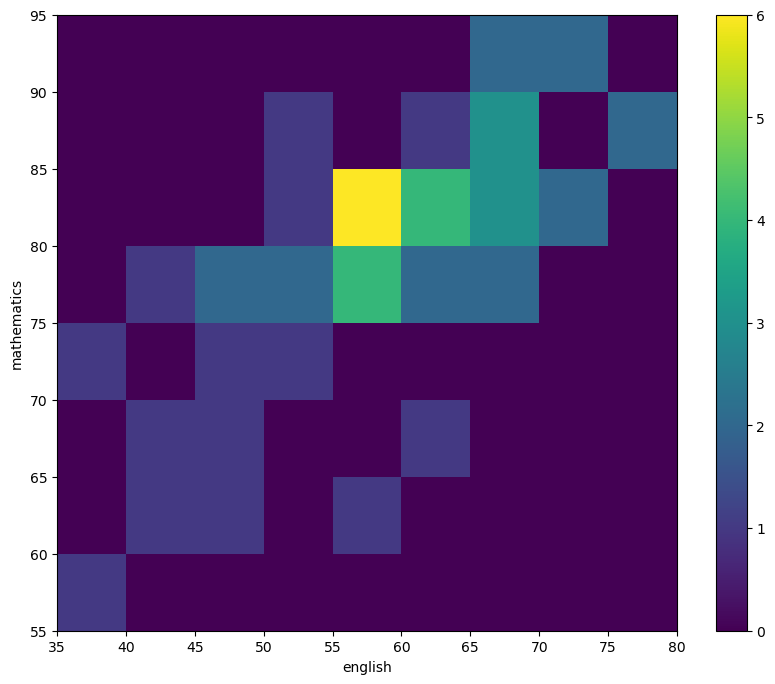

In [77]:
fig, ax = plt.subplots(figsize=(10, 8))
c = ax.hist2d(english_scores, math_scores, bins=[9, 8], range=[(35, 80), (55, 95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3], ax=ax)
plt.show()